### Semaine 2 : Des modèles simple de prédictions

Après la petite documentation que nous avions faite, nous sommes allés directement à appliquer des méthodes plus au moins simple sur la base de donnée fournie par le projet suivant : [Analyse de trajectoires](https://github.com/AmigoCap/GPSFlow/blob/master/3-Segmentation.ipynb)

Nous avons rencontré un problème lors de l'exploitation des données, la base de donnée était trop lourde ce qui nous n'a limité à travailler juste sur un petit échantillon.

##### Regression linéaire : Y = a x + b 

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
raw = pd.io.json.read_json("data/iphone.json") # Collecte des données à partir du fichier iphone.json
df = raw['locations'].apply(pd.Series) 

# Filtrer les données : latitude and longitude columns
df['latitude'] = df['latitudeE7'] * 0.0000001
df['longitude'] = df['longitudeE7'] * 0.0000001
columns = ["latitude", "longitude"]
for col in list(df) :
	if col not in columns :
		del df[col]

In [14]:
df.head(23)

,latitude,longitude
0,45.756972,4.834450
1,45.756961,4.834579
2,45.756251,4.833615
3,45.756069,4.833665
4,45.752833,4.832869
5,45.753032,4.831799
6,45.752684,4.833024
7,45.753192,4.831967
8,45.752833,4.832869
9,45.752939,4.833662


In [42]:
npMatrix = np.matrix(df)
X, Y = npMatrix[:,0], npMatrix[:,1] # X represente la matrice colonne de latitude / Y represente la matrice colonne de longitude
mdl = LinearRegression().fit(X,Y) 
a = mdl.coef_[0] 
b = mdl.intercept_
print("La droite de regression")
print("Y = ",a,"X"," + ",b );

La droite de regression
Y =  [-1.22338024] X  +  [60.80017603]


In [16]:
# Transformation des matrices X et Y en array list pour pourvoir ensuite les représentées par les méthodes scatter et plot

x = [0]*23
y = [0]*23
for j in range(0,23):
    a = numpy.array(X)[j]
    for i in a:
        x[j] = i
for j in range(0,23):
    a = numpy.array(Y)[j]
    for i in a:
        y[j] = i
    
print(x) 
print(y)

[45.756972499999996, 45.7569611, 45.7562515, 45.7560693, 45.7528333, 45.7530316, 45.752683999999995, 45.753192, 45.7528333, 45.7529393, 45.7498284, 45.7635882, 45.774839899999996, 45.7743859, 45.7864611, 45.7857924, 45.783725, 45.7829129, 45.782812, 45.7695955, 45.7718351, 45.790937299999996, 45.790112099999995]
[4.8344499, 4.834579499999999, 4.8336146, 4.8336654, 4.8328691, 4.8317989, 4.8330239, 4.8319668, 4.8328691, 4.8336622, 4.8248717999999995, 4.8026206, 4.7841689999999994, 4.7847786999999995, 4.7824659, 4.7694933, 4.770413899999999, 4.766565, 4.766814, 4.7699888, 4.7777848, 4.8128654, 4.8667777]


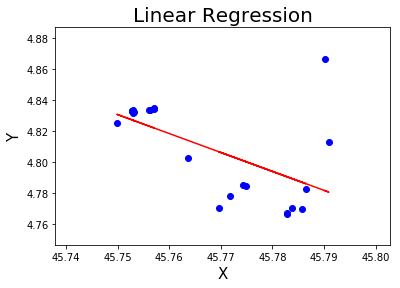

In [17]:
plt.scatter(x,y, color='blue')
plt.plot(x,mdl.predict(X),color='red')
plt.title('Linear Regression', fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

##### Regression polynomiale :

La régression linéaire est une régression polynomiale de degré 1.

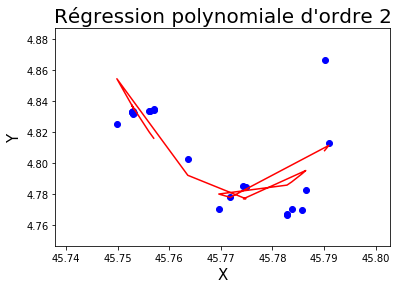

In [79]:
plt.scatter(x,y, color='blue')
p2 = polyfit(x,y,2)
plt.plot(x,polyval(p2,x),'r-')
plt.title("Régression polynomiale d'ordre 2", fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

###### Résumé : 

In [76]:
R1 = polyfit(x,y,1)
R2 = polyfit(x,y,2)
R3 = polyfit(x,y,3)
print(R1)
print(R2)
print(R3)

[-1.22338024 60.80017603]
[ 1.27551884e+02 -1.16772461e+04  2.67264798e+05]
[ 1.01260652e+04 -1.39030730e+06  6.36296597e+07 -9.70704654e+08]


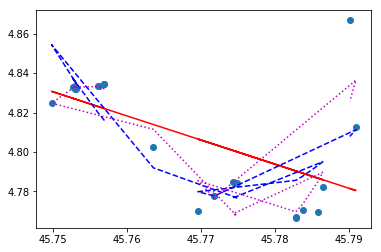

In [77]:
plt.plot(x,y,'o')
plt.plot(x,polyval(R1,x),'r-')
plt.plot(x,polyval(R2,x),'b--')
plt.plot(x,polyval(R3,x),'m:')

In [109]:
print("\nRésultat retrouvé par le modèle de regression linéaire -Regression polynomiale ordre 1- \n")
yfit1 = [0]*23
for i in range(0,23):
    yfit1[i] = R1[0]*x[i] + R1[1]
    
print(yfit1)


print("\nRésultat observé \n")
print(y)


Résultat retrouvé par le modèle de regression linéaire -Regression polynomiale ordre 1- 

[4.82199983857479, 4.822013785109569, 4.822881895730859, 4.82310479561135, 4.8270636540815985, 4.826821057779171, 4.827246304752059, 4.826624827587999, 4.8270636540815985, 4.8269339757757095, 4.830739789377404, 4.8139063218932066, 4.800141214399503, 4.800696629030369, 4.785924067905562, 4.7867421422748535, 4.789271358591726, 4.790264865688037, 4.7903883047546785, 4.806557109752198, 4.8038172273572854, 4.780447973256457, 4.78145750663397]

Résultat observé 

[4.8344499, 4.834579499999999, 4.8336146, 4.8336654, 4.8328691, 4.8317989, 4.8330239, 4.8319668, 4.8328691, 4.8336622, 4.8248717999999995, 4.8026206, 4.7841689999999994, 4.7847786999999995, 4.7824659, 4.7694933, 4.770413899999999, 4.766565, 4.766814, 4.7699888, 4.7777848, 4.8128654, 4.8667777]


In [114]:
print("Modèle 1\n")
# Calcul de l'erreur commise

yresid1 = [0]*23
for i in range (0,23):
    yresid1[i] = y[i] - yfit1[i]

# Calcul de l'ecart quadratique
SSresid1 = 0 

for i in range (0,23):
    SSresid1 += yresid1[i]**2

SStotal1 = len(y)*var(y)

#Calcul du coefficient de détermination

rsq1 = 1 - (SSresid1/SStotal1)
print("le coefficient de détermination = ",rsq1*100,"%\n")
print("On peut dire que le modèle linéaire est loin d'etre un modèle qui correspond à la réalité ")

Modèle 1

le coefficient de détermination =  34.17919224986261 %

On peut dire que le modèle linéaire est loin d'etre un modèle qui correspond à la réalité 


##### Curve fitting

Nous allons essayé maintenant d'appliquer une méthode de la lib python pour chercher la trajectoire existante la plus similaire/probable

10126.065203617634 ---------- coef ordre 3 
 -1390307.2985983652 ---------- coef ordre 2 
 63629659.73663026 ---------- coef ordre 1 
 -970704654.2266803 ---------- coef ordre 0


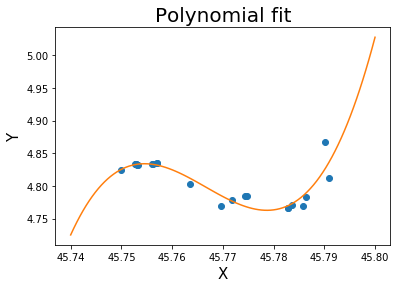

In [117]:
x_p = np.linspace(45.74,45.80,100)
p3 = np.polyfit(x,y,3) # Regression de degre 3
print(p3[0],"---------- coef ordre 3 \n",p3[1],"---------- coef ordre 2 \n",p3[2],"---------- coef ordre 1 \n",p3[3],"---------- coef ordre 0")
y_p = np.polyval(p3,x_p)
plt.title('Polynomial fit', fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x,y,'o')
plt.plot(x_p,y_p,'-')

In [124]:
print("\nRésultat retrouvé par le modèle de regression linéaire -Regression polynomiale ordre 1- \n")

yfit = [0]*23
xcube = [0]*23
xcarre = [0]*23

for k in range(0,23):
    xcube[k] = x[k]*x[k]*x[k]

for j in range(0,23):
    xcarre[j] = x[j]*x[j]
    
for i in range(0,23):
    yfit[i] = p3[0]*xcube[i] + p3[1]*xcarre[i] + p3[2]*x[i] + p3[3] 
    
print(yfit)


print("\nRésultat observé \n")
print(y)


Résultat retrouvé par le modèle de regression linéaire -Regression polynomiale ordre 1- 

[4.831949710845947, 4.831968069076538, 4.8329455852508545, 4.833146572113037, 4.832824468612671, 4.833075523376465, 4.832613468170166, 4.833254337310791, 4.832824468612671, 4.832962512969971, 4.82471489906311, 4.811487197875977, 4.767613410949707, 4.76874041557312, 4.78967809677124, 4.784904956817627, 4.7733635902404785, 4.770074844360352, 4.769712686538696, 4.785457611083984, 4.776719093322754, 4.836396217346191, 4.825719356536865]

Résultat observé 

[4.8344499, 4.834579499999999, 4.8336146, 4.8336654, 4.8328691, 4.8317989, 4.8330239, 4.8319668, 4.8328691, 4.8336622, 4.8248717999999995, 4.8026206, 4.7841689999999994, 4.7847786999999995, 4.7824659, 4.7694933, 4.770413899999999, 4.766565, 4.766814, 4.7699888, 4.7777848, 4.8128654, 4.8667777]


In [126]:
print("Modèle polynomial\n")
# Calcul de l'erreur commise

yresid = [0]*23
for i in range (0,23):
    yresid[i] = y[i] - yfit[i]

# Calcul de l'ecart quadratique
SSresid = 0 

for i in range (0,23):
    SSresid += yresid[i]**2

SStotal = len(y)*var(y)

#Calcul du coefficient de détermination

rsq = 1 - (SSresid/SStotal)
print("le coefficient de détermination = ",rsq*100,"%\n")
print("Le modèle correspond bien à la réalité observée")

Modèle polynomial

le coefficient de détermination =  83.3392833340111 %

Le modèle correspond bien à la réalité observée
